In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##steps of ml  
'''
1 have a dataset
2 tarin teset split of dataset
3 sklearn
'''

'\n1 have a dataset\n2 tarin teset split of dataset\n3 sklearn\n'

In [22]:
##read the dataset
df =pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

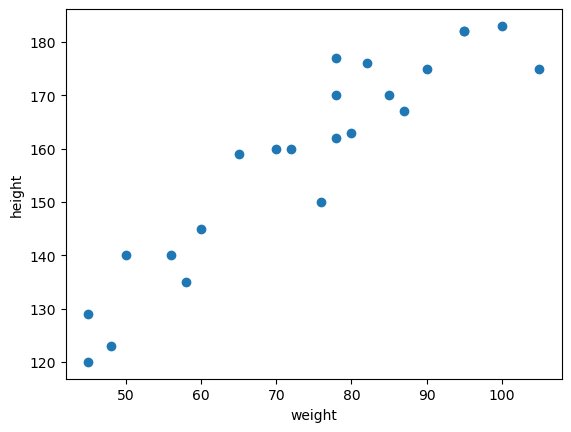

In [23]:
## scatter plot
plt.scatter(df['Weight'],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [37]:
#independent feature and dependent feature
X = df[['Weight']]
y = df['Height']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=123)

In [39]:
##standardize the dataset train independent dat
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
X.shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

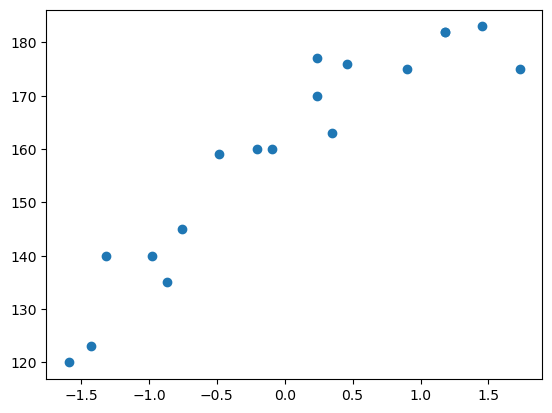

In [41]:
plt.scatter(X_train, y_train)

In [42]:
## train the simple linear Regression model
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(X_train,y_train)

LinearRegression()

In [48]:
print("slope of coefficient of weight is: ",regressor.coef_)
print("Intercept",regressor.intercept_)

slope of coefficient of weight is:  [18.6274989]
Intercept 159.16666666666666


In [ ]:
plt.scatter(X_train,y_train)